# Job Descriptions Text Datasets

In [1]:
from text_data_toolkit import data_cleaning as dc
from text_data_toolkit import data_transformation as dt
from text_data_toolkit import eda
from text_data_toolkit import file_operations as fop
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
# check out files in data folder
fop.list_files('../data')

['Restaurant_Reviews_Test.tsv',
 'DataScientist.csv',
 'job_postings.csv',
 'Restaurant_Reviews.csv',
 'job_summary_mini.csv',
 'job_skills.csv',
 'Restaurant_Reviews.tsv',
 'job_summary.csv',
 'Restaurant_Reviews2.txt']

In [3]:
# import data to dfs using method from data_cleaning
# DataScientist.csv is from 2020
# job_summary is from 2024
# we will see how much has changed and what employers look for
files = ['../data/DataScientist.csv',
         '../data/job_summary.csv',
         '../data/job_skills.csv',
         '../data/job_postings.csv']

dfs = dc.load_text_to_df(files, columns = None, line_length = 1)


In [4]:
dfs

{'DataScientist':       Unnamed: 0  index                                          Job Title  \
 0              0      0                              Senior Data Scientist   
 1              1      1                  Data Scientist, Product Analytics   
 2              2      2                               Data Science Manager   
 3              3      3                                       Data Analyst   
 4              4      4                             Director, Data Science   
 ...          ...    ...                                                ...   
 3904        3904   4375                                  AWS Data Engineer   
 3905        3905   4376                              Data Analyst â Junior   
 3906        3906   4377                   Security Analytics Data Engineer   
 3907        3907   4378                   Security Analytics Data Engineer   
 3908        3908   4379  Patient Safety Physician or Safety Scientist -...   
 
                    Salary Estima

In [5]:
# 2020 data set
df_ds_jobs_raw = dfs['DataScientist']
df_ds_jobs_raw.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


# 2020 Dataset

In [6]:
df_ds_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

# Clean Job Summaries

In [7]:
# drop unnamed column and index (both are indexes)
df_ds_jobs_raw = df_ds_jobs_raw.drop(["Unnamed: 0", "index"], axis = 1)

In [8]:
# fix column headers
df_ds_jobs_raw.columns = df_ds_jobs_raw.columns.str.lower().str.replace(r'\s', '_', regex=True)

In [9]:
df_ds_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          3909 non-null   object 
 1   salary_estimate    3909 non-null   object 
 2   job_description    3909 non-null   object 
 3   rating             3909 non-null   float64
 4   company_name       3909 non-null   object 
 5   location           3909 non-null   object 
 6   headquarters       3909 non-null   object 
 7   size               3909 non-null   object 
 8   founded            3909 non-null   int64  
 9   type_of_ownership  3909 non-null   object 
 10  industry           3909 non-null   object 
 11  sector             3909 non-null   object 
 12  revenue            3909 non-null   object 
 13  competitors        3909 non-null   object 
 14  easy_apply         3909 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 458.2+ KB


In [10]:
# data types look good, no NaN's present and no more duplicates
df_ds_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          3909 non-null   object 
 1   salary_estimate    3909 non-null   object 
 2   job_description    3909 non-null   object 
 3   rating             3909 non-null   float64
 4   company_name       3909 non-null   object 
 5   location           3909 non-null   object 
 6   headquarters       3909 non-null   object 
 7   size               3909 non-null   object 
 8   founded            3909 non-null   int64  
 9   type_of_ownership  3909 non-null   object 
 10  industry           3909 non-null   object 
 11  sector             3909 non-null   object 
 12  revenue            3909 non-null   object 
 13  competitors        3909 non-null   object 
 14  easy_apply         3909 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 458.2+ KB


In [11]:
# clean job descriptions column - normalize text
dc.clean_dataframe_no_dups(df_ds_jobs_raw, "job_description")

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),about hopper at hopper were on a mission to ma...,3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),at noom we use scientifically proven methods t...,4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),decode_m httpswwwdecodemcom data science manag...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),sapphire digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),director data science 200537 description edelm...,3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),about us tachyon technologies is a digital tra...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),job description interpret data analyze results...,5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),job descriptionthe security analytics data eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),the security analytics data engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [12]:
# check for irrelevant jobs

df_ds_jobs_raw_bad_titles = df_ds_jobs_raw[~df_ds_jobs_raw["job_title"].str.contains("data|engineer|ml |machine learning|ai ", case=False, regex=True)]
df_ds_jobs_raw_bad_titles

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
6,Quantitative Researcher,$111K-$181K (Glassdoor est.),experience entrylevel phd program or experienc...,4.4,PDT Partners\n4.4,"New York, NY","New York, NY",51 to 200 employees,1993,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,Quantitative Research Associate,$111K-$181K (Glassdoor est.),seeking a quant to work with senior researcher...,-1.0,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
9,Quantitative Researcher,$111K-$181K (Glassdoor est.),about the position at jane street we consider ...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
22,Quantitative Researcher – Intern (US),$111K-$181K (Glassdoor est.),job description quantitative researchers at ci...,4.1,Citadel Securities\n4.1,"New York, NY","Chicago, IL",201 to 500 employees,2002,Company - Private,Brokerage Services,Finance,Unknown / Non-Applicable,Virtu Financial,-1
41,Quantitative Researcher / Quantitative Researc...,$120K-$140K (Glassdoor est.),job description role summary at citadel securi...,4.1,Citadel Securities\n4.1,"New York, NY","Chicago, IL",201 to 500 employees,2002,Company - Private,Brokerage Services,Finance,Unknown / Non-Applicable,Virtu Financial,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,IGM - Post Doctoral Scientist - Chaudhari Lab,$39K-$86K (Glassdoor est.),job posting post doctoral scientist igm fullti...,3.7,Nationwide Children's Hospital\n3.7,"Columbus, OH","Columbus, OH",10000+ employees,1892,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1
3884,Senior Research Scientist - RI IPP Cooper,$55K-$112K (Glassdoor est.),job posting senior research scientist ri ipp c...,3.7,Nationwide Children's Hospital\n3.7,"Columbus, OH","Columbus, OH",10000+ employees,1892,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1
3893,Biotransformation Scientist and DMPK Design Lead,$55K-$112K (Glassdoor est.),help us transform patients lives at ucb we put...,3.7,UCB\n3.7,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),AbbVie,-1
3895,Senior/Principal Scientist - Display Technolog...,$55K-$112K (Glassdoor est.),help us transform patients lives at ucb we put...,3.7,UCB\n3.7,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),AbbVie,-1


Most of these jobs could be seen as irrelevant to data science. Removing 836 records would get rid of a huge chunk of our dataset. I will filter these by job_description as well to see if they are truly irrelevant

In [13]:
df_ds_jobs_raw_bad_titles_2nd = df_ds_jobs_raw_bad_titles[~df_ds_jobs_raw_bad_titles["job_description"].str.contains("python|machine learning|data science", case=False, regex=True)]
df_ds_jobs_raw_bad_titles_2nd

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
7,Quantitative Research Associate,$111K-$181K (Glassdoor est.),seeking a quant to work with senior researcher...,-1.0,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
9,Quantitative Researcher,$111K-$181K (Glassdoor est.),about the position at jane street we consider ...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
48,Quantitative Research Analyst,$120K-$140K (Glassdoor est.),please note this role is for experienced candi...,3.6,Tower Research Capital\n3.6,"New York, NY","New York, NY",501 to 1000 employees,1998,Company - Private,Financial Analytics & Research,Finance,Unknown / Non-Applicable,-1,-1
127,Quantitative Analyst Intern,$102K-$121K (Glassdoor est.),what youll do daytoday for quantitative analys...,4.4,D. E. Shaw & Co.\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,1988,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,"Renaissance Technologies LLC, Two Sigma, AQR C...",True
165,Business Intelligence Analyst,$156K-$254K (Glassdoor est.),about us simple health is on a mission to redu...,4.4,Simple Health\n4.4,"New York, NY","New York, NY",51 to 200 employees,2015,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,Post Doctoral Scientist - RI Childhood Cancer ...,$39K-$86K (Glassdoor est.),job posting post doctoral scientist ri childho...,3.7,Nationwide Children's Hospital\n3.7,"Columbus, OH","Columbus, OH",10000+ employees,1892,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1
3884,Senior Research Scientist - RI IPP Cooper,$55K-$112K (Glassdoor est.),job posting senior research scientist ri ipp c...,3.7,Nationwide Children's Hospital\n3.7,"Columbus, OH","Columbus, OH",10000+ employees,1892,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1
3893,Biotransformation Scientist and DMPK Design Lead,$55K-$112K (Glassdoor est.),help us transform patients lives at ucb we put...,3.7,UCB\n3.7,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),AbbVie,-1
3895,Senior/Principal Scientist - Display Technolog...,$55K-$112K (Glassdoor est.),help us transform patients lives at ucb we put...,3.7,UCB\n3.7,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),AbbVie,-1


I cut the list down by a few hundred, but from quickly browsing the descriptions in the second pass look, these jobs do seem to be truly irrelevant to data science, but might include other types of science or research. We're not looking for that though.

In [14]:
# remove irrelevant jobs
indexes_to_remove = df_ds_jobs_raw_bad_titles_2nd.index.tolist()
df_ds_jobs_raw.drop(indexes_to_remove, inplace=True)

In [15]:
df_ds_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3243 entries, 0 to 3907
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          3243 non-null   object 
 1   salary_estimate    3243 non-null   object 
 2   job_description    3243 non-null   object 
 3   rating             3243 non-null   float64
 4   company_name       3243 non-null   object 
 5   location           3243 non-null   object 
 6   headquarters       3243 non-null   object 
 7   size               3243 non-null   object 
 8   founded            3243 non-null   int64  
 9   type_of_ownership  3243 non-null   object 
 10  industry           3243 non-null   object 
 11  sector             3243 non-null   object 
 12  revenue            3243 non-null   object 
 13  competitors        3243 non-null   object 
 14  easy_apply         3243 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 405.4+ KB


In [16]:
# check for duplicates
print(df_ds_jobs_raw.duplicated().sum())
df_ds_jobs_raw["job_description"].duplicated().sum()

0


np.int64(214)

We have some duplicate job descriptions. We will look into this

In [17]:
# check out duplicate summaries
df_ds_jobs_raw[df_ds_jobs_raw["job_description"].duplicated(keep=False)].groupby("job_description").size().reset_index(name='count')

,job_description,count
0,ability to coordinate with people of many diff...,2
1,ability to develop analytics for multiple cybe...,2
2,about freestar freestar engineers cuttingedge ...,2
3,address 111 w monroe 115 s lasalle job family ...,2
4,are you interested in helping texas create com...,2
...,...,...
110,we are pioneers we were the first to break the...,2
111,we seek to fill the role of a senior futures q...,2
112,who we are at maven wave we are relentless in ...,2
113,who we look for an sei consultant is a master ...,6


There are a lot of exact duplicate job descriptions. These could be due to different locations having the same position open.

An example is searching for IBM below. They have tons of the same job title, but in different cities or with different pay. I would remove these extras as it will saturate the visualizations.

In [18]:
df_ds_jobs_raw[df_ds_jobs_raw['company_name'].str.contains('IBM', case=False)].sort_values(by='job_title').head(7)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
1695,Microsoft Analytics Consultant,$44K-$80K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Philadelphia, PA","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
3787,Microsoft Analytics Consultant,$98K-$160K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Columbus, OH","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
1381,Microsoft Analytics Consultant,$46K-$104K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Phoenix, AZ","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
2556,Microsoft Analytics Consultant,$49K-$78K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Dallas, TX","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
505,Microsoft Analytics Consultant,$76K-$125K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Los Angeles, CA","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
3329,Microsoft Analytics Consultant,$100K-$152K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Austin, TX","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
1126,Microsoft Analytics Consultant,$36K-$71K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Houston, TX","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1


In [19]:
# remove duplicates, but use the original df when plotting location data
df_ds_jobs_raw_no_dups = df_ds_jobs_raw.drop_duplicates(subset=["job_description"], keep="first")

In [20]:
df_ds_jobs_raw_no_dups["job_description"].duplicated().sum()

np.int64(0)

No more dups, irrelevant jobs, and no missing values. The data is ready for EDA

# EDA

In [21]:
# skill count -- PLOT THESE LATER
labeled_job_skills_2020 = dt.label_job_skills(df_ds_jobs_raw_no_dups, "job_description", custom_skills=None)
labeled_job_skills_2020

{'scikit': 168,
 'nlp': 302,
 'react': 62,
 'cloud': 1702,
 'sql': 3649,
 'regex': 4,
 'pyspark': 107,
 'tableau': 799,
 'javascript': 185,
 'machine learning': 3008,
 'pytorch': 129,
 'python': 2675,
 'snowflake': 209,
 'spark': 1352,
 'html': 77}

It's interesting that python and sql are not mentioned much, but cloud is mentioned a lot. Machine learning is mentioned in most listings which is expected.

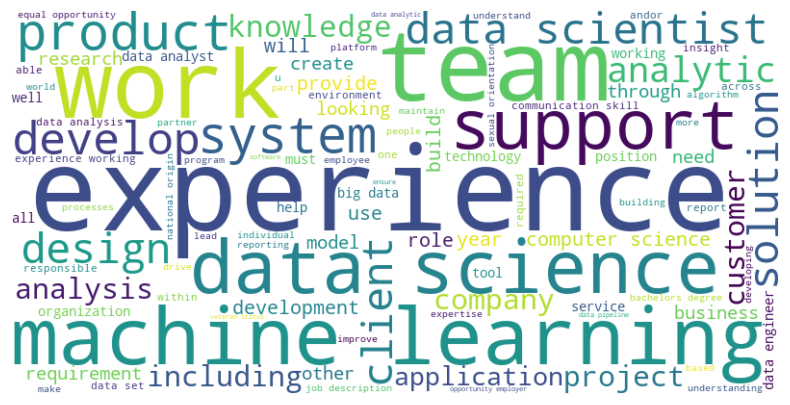

In [22]:
# generate word cloud with more stop words - 11s
more_stopwords = ["such", "ability", "d"]
wordcloud_2020 = eda.generate_wordcloud(df_ds_jobs_raw_no_dups["job_description"], more_stopwords)
wordcloud_2020

We get a good idea here of the most used words in the dataset.

There is a lot of emphasis on experience, team, machine learning and ability.

In [23]:
# this could be used when first looking at a dataset over df.info()
text_summary_stats_2020 = eda.text_summary_stats(df_ds_jobs_raw_no_dups, "job_description")
text_summary_stats_2020

{'document_stats': {'total_docs': 3029, 'empty_docs': 0, 'unique_docs': 3029},
 'length_stats': {'min_length': 41,
  'max_length': 19393,
  'total_length': 9867195,
  'char_count_mean': 3257.5751072961375,
  'char_count_median': 3019},
 'word_stats': {'avg_words_per_doc': 470.53317926708485,
  'total_words': 1425245,
  'unique_words': 30973,
  'avg_word_length': 5.925231802251543},
 'frequent_words': {'data': 31459,
  'experience': 15735,
  'business': 7773,
  'work': 7293,
  'will': 7114,
  'team': 5745,
  'skills': 5135,
  'years': 4625,
  'science': 4555,
  'analysis': 4199}}

Data shows up as the most frequent word, but not in the word cloud. The word cloud is pairing data with other words. ie. "Data Management", "Data Science"

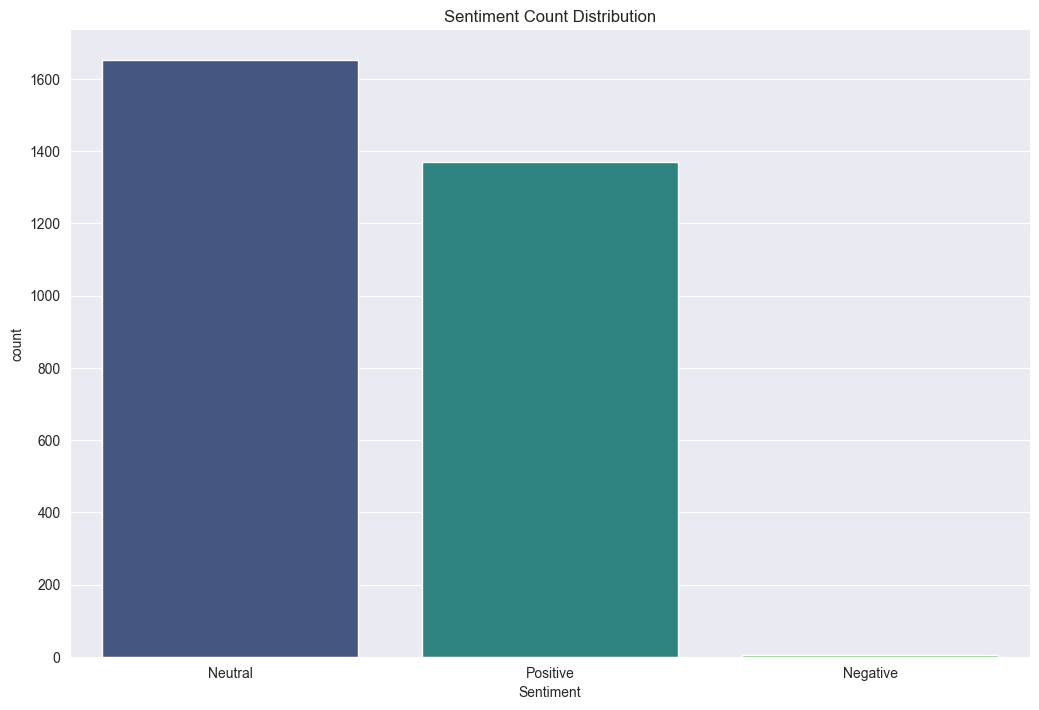

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,Sentiment
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),about hopper at hopper were on a mission to ma...,3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,Neutral
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),at noom we use scientifically proven methods t...,4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,Positive
2,Data Science Manager,$111K-$181K (Glassdoor est.),decode_m httpswwwdecodemcom data science manag...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,Positive
3,Data Analyst,$111K-$181K (Glassdoor est.),sapphire digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,Positive
4,"Director, Data Science",$111K-$181K (Glassdoor est.),director data science 200537 description edelm...,3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,Columbus Data Science Tutor Jobs,$55K-$112K (Glassdoor est.),columbus data science tutor jobs varsity tutor...,4.2,Varsity Tutors\n4.2,"Columbus, OH","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1,Positive
3903,Cyber Security Data Engineer,$55K-$112K (Glassdoor est.),aptask is a leading staffing and recruitment c...,3.9,ApTask\n3.9,"Dublin, OH","Iselin, NJ",201 to 500 employees,2010,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),"Collabera, Mitchell Martin, The Judge Group",-1,Positive
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),about us tachyon technologies is a digital tra...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1,Positive
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),job descriptionthe security analytics data eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1,Neutral


In [24]:
sentiment_dist_2020 = eda.plot_sentiment_distribution(df_ds_jobs_raw_no_dups, "job_description")
sentiment_dist_2020

The negative plot being empty make sense as you wouldn't want to see negative descriptions where you want to attract applicants

In [25]:
# top ngrams
top_ngrams_2020 = eda.top_ngrams(df_ds_jobs_raw_no_dups["job_description"])
top_ngrams_2020

[(('experience', 'with'), 4203),
 (('of', 'the'), 4002),
 (('ability', 'to'), 3650),
 (('in', 'the'), 3311),
 (('experience', 'in'), 3208),
 (('machine', 'learning'), 2906),
 (('years', 'of'), 2755),
 (('in', 'a'), 2736),
 (('data', 'science'), 2446),
 (('you', 'will'), 2318)]

In [26]:
# top ngrams with stopwords
stopwords = ['of', 'the', 'be', 'to', 'show', 'equal', 'as', 'this']
top_ngrams_2020_stopwords = eda.top_ngrams(df_ds_jobs_raw_no_dups["job_description"], stopwords, n=3, top_k=15)
top_ngrams_2020_stopwords

[(('in', 'computer', 'science'), 759),
 (('years', 'experience', 'in'), 749),
 (('an', 'opportunity', 'employer'), 617),
 (('experience', 'working', 'with'), 603),
 (('bachelors', 'degree', 'in'), 528),
 (('or', 'any', 'other'), 525),
 (('sexual', 'orientation', 'gender'), 500),
 (('are', 'looking', 'for'), 492),
 (('looking', 'for', 'a'), 478),
 (('is', 'a', 'plus'), 477),
 (('and', 'machine', 'learning'), 462),
 (('computer', 'science', 'or'), 455),
 (('we', 'are', 'looking'), 447),
 (('race', 'color', 'religion'), 445),
 (('is', 'an', 'opportunity'), 441)]

These top ngrams make sense for job descriptions. Seems like employers really want computer science majors in data science roles!

# Visualization

# 2024 dataset

In [27]:
df_job_summaries_raw = dfs['job_summary']
df_job_summaries_raw.shape

(12217, 2)

In [28]:
df_job_skills_raw = dfs['job_skills']
df_job_skills_raw.shape

(12217, 2)

In [29]:
df_job_postings_raw = dfs['job_postings']
df_job_postings_raw.shape

(12217, 15)

The job_ csvs have the same amount of rows in all files so we may be able to join these into one df.


In [30]:
print("First index")
print(df_job_summaries_raw.iloc[0, 0])
print(df_job_skills_raw.iloc[0, 0])
print(df_job_postings_raw.iloc[0, 0])
print("Random Index")
print(df_job_summaries_raw.iloc[876, 0])
print(df_job_skills_raw.iloc[876, 0])
print(df_job_postings_raw.iloc[876, 0])


First index
https://www.linkedin.com/jobs/view/senior-machine-learning-engineer-at-jobs-for-humanity-3804053819
https://www.linkedin.com/jobs/view/senior-machine-learning-engineer-at-jobs-for-humanity-3804053819
https://www.linkedin.com/jobs/view/senior-machine-learning-engineer-at-jobs-for-humanity-3804053819
Random Index
https://uk.linkedin.com/jobs/view/senior-data-analyst-financial-crime-at-nala-3805461162
https://uk.linkedin.com/jobs/view/senior-data-analyst-financial-crime-at-nala-3805461162
https://uk.linkedin.com/jobs/view/senior-data-analyst-financial-crime-at-nala-3805461162


Upon double checking, the rows do line up with eachother by index, so this would be an easy join. They could have been joined off of job_link either way

In [31]:
# join the job_ tables
merged_jobs_raw_2 = pd.merge(df_job_summaries_raw, df_job_postings_raw, left_index=True, right_index=True)
merged_jobs_raw = pd.merge(merged_jobs_raw_2, df_job_skills_raw, left_index=True, right_index=True)
print(merged_jobs_raw.shape) # check column count
merged_jobs_raw.head() # check that merge worked

(12217, 19)


,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,Company Description\nJobs for Humanity is part...,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"Location: New York City, NY\nPosition Summary\...",https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,Responsibilities:\nCandidate must have signifi...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,Dice is the leading career destination for tec...,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


# Clean Job Summaries


In [32]:
# check for NaNs and look at stats for dataset
text_summary_stats_2024 = eda.text_summary_stats(merged_jobs_raw, "job_summary")
text_summary_stats_2024 # setting as variable so we can plot frequent words

{'document_stats': {'total_docs': 12217, 'empty_docs': 0, 'unique_docs': 9536},
 'length_stats': {'min_length': 20,
  'max_length': 18826,
  'total_length': 50766361,
  'char_count_mean': 4155.386838012605,
  'char_count_median': 3883},
 'word_stats': {'avg_words_per_doc': 605.3288041253991,
  'total_words': 7395302,
  'unique_words': 68955,
  'avg_word_length': 5.866325134524594},
 'frequent_words': {'data': 122972,
  'experience': 65830,
  'will': 36123,
  'work': 35210,
  'team': 29123,
  'business': 28420,
  'more': 24710,
  'show': 24670,
  'skills': 22749,
  'years': 22528}}

A few NaN's in job_skills and one location. We will investigate this.

In [33]:
merged_jobs_raw[merged_jobs_raw["job_skills"].isna()]

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills
670,https://www.linkedin.com/jobs/view/mltc-nurse-...,overview do you have a passion for caring for ...,https://www.linkedin.com/jobs/view/mltc-nurse-...,2024-01-19 16:48:10.353136+00,Finished NER,t,t,f,MLTC-Nurse Care Manager (Brooklyn Office),RiverSpring Living,"Brooklyn, NY",2024-01-14,Freeport,United States,Dispatcher Service,Mid senior,Onsite,https://www.linkedin.com/jobs/view/mltc-nurse-...,NaN
7898,https://www.linkedin.com/jobs/view/high-school...,high school speechlanguage pathologist fmla an...,https://www.linkedin.com/jobs/view/high-school...,2024-01-19 13:33:45.46882+00,Finished NER,t,t,f,High School Speech-Language Pathologist: FMLA,AnthroMed Education,"Summit, IL",2024-01-13,Chicago,United States,Pathologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/high-school...,NaN
9598,https://uk.linkedin.com/jobs/view/notam-aviati...,nats is the uks leading air navigation service...,https://uk.linkedin.com/jobs/view/notam-aviati...,2024-01-21 14:13:25.895518+00,Finished NER,t,t,f,NOTAM Aviation Data Operator,NATS,"Swanwick, England, United Kingdom",2024-01-14,Derby,United Kingdom,Solutions Operator,Associate,Onsite,https://uk.linkedin.com/jobs/view/notam-aviati...,NaN
10840,https://www.linkedin.com/jobs/view/mltc-nurse-...,overview do you have a passion for caring for ...,https://www.linkedin.com/jobs/view/mltc-nurse-...,2024-01-20 13:11:57.737368+00,Finished NER,t,t,f,MLTC-Nurse Care Manager- Bilingual Russian (Br...,RiverSpring Living,"Brooklyn, NY",2024-01-14,Westfield,United States,Dye-House Supervisor,Mid senior,Onsite,https://www.linkedin.com/jobs/view/mltc-nurse-...,NaN
10846,https://www.linkedin.com/jobs/view/medical-lab...,osha risk factor category i physical demands m...,https://www.linkedin.com/jobs/view/medical-lab...,2024-01-20 13:17:44.334222+00,Finished NER,t,t,f,Medical Lab Technician (MLT) PRN,Lifepoint Health®,"Hot Springs, AR",2024-01-13,Arkansas,United States,Fitter I,Mid senior,Onsite,https://www.linkedin.com/jobs/view/medical-lab...,NaN


These jobs with NaN's in job_skills don't even look like data jobs. It's worth looking through the rest of the job_titles to see how many more are irrelevant.

In [34]:
# check for irrelevant jobs
# homogenize job titles first
merged_jobs_raw["clean_job_title"] = merged_jobs_raw["job_title"].str.lower().str.replace(r'[^\w\s]', '', regex=True)

merged_jobs_bad_titles = merged_jobs_raw[~merged_jobs_raw["clean_job_title"].str.contains("data|engineer|ml |machine learning", case=False, regex=True)]
merged_jobs_bad_titles

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title
12,https://www.linkedin.com/jobs/view/4-corporate...,job 1 corporate associate the ideal candidate ...,https://www.linkedin.com/jobs/view/4-corporate...,2024-01-21 05:31:32.650457+00,Finished NER,t,t,f,4 Corporate Associate Positions (AmLaw),LHH,"Atlanta, GA",2024-01-16,Crookston,United States,Floor Worker,Associate,Onsite,https://www.linkedin.com/jobs/view/4-corporate...,"Corporate Law, Private Equity, Venture Capital...",4 corporate associate positions amlaw
57,https://www.linkedin.com/jobs/view/medical-lab...,summary now offering upto 5000 signon bonus jo...,https://www.linkedin.com/jobs/view/medical-lab...,2024-01-21 07:04:48.563174+00,Finished NER,t,t,f,Medical Laboratory Scientist MLS-MT - Incentiv...,"St. Luke's Duluth, MN","Duluth, MN",2024-01-14,Minnesota,United States,Medical Technologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/medical-lab...,"Medical Laboratory Science, ASCP Certification...",medical laboratory scientist mlsmt incentive ...
58,https://www.linkedin.com/jobs/view/registered-...,entrust your career to healthtrustmedical lab ...,https://www.linkedin.com/jobs/view/registered-...,2024-01-19 23:01:06.52416+00,Finished NER,t,t,f,Registered Nurse (RN) - Medical Laboratory Tec...,Health eCareers,"Austin, TX",2024-01-15,Austin,United States,Cytotechnologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/registered-...,"Medical Lab Technician (MLT), Compassion, Atte...",registered nurse rn medical laboratory tech m...
63,https://www.linkedin.com/jobs/view/medical-tec...,title medical technologist location columbus o...,https://www.linkedin.com/jobs/view/medical-tec...,2024-01-19 22:19:44.002824+00,Finished NER,t,t,f,Medical Technologist MT or MLT,Gables Search Group,"Columbus, OH",2024-01-15,Columbus,United States,Aquatic Biologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/medical-tec...,"Medical Technologist, Medical Laboratory Techn...",medical technologist mt or mlt
112,https://www.linkedin.com/jobs/view/mls-dayshif...,with a legacy that spans over 150 years bon se...,https://www.linkedin.com/jobs/view/mls-dayshif...,2024-01-19 17:05:58.912618+00,Finished NER,t,t,f,MLS Dayshift Lead - Short Pump Emergency Center,Bon Secours,"Henrico, VA",2024-01-16,Virginia,United States,Supervisor Instrument Maintenance,Mid senior,Onsite,https://www.linkedin.com/jobs/view/mls-dayshif...,"Medical Lab Scientist Certification, Clinical ...",mls dayshift lead short pump emergency center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,https://www.linkedin.com/jobs/view/product-man...,job description senior product manageraiml man...,https://www.linkedin.com/jobs/view/product-man...,2024-01-21 05:39:58.890809+00,Finished NER,t,t,f,Product Manager Ecommerce / Retail / AI/ML,Photon,San Francisco Bay Area,2024-01-14,Union City,United States,Scanner,Mid senior,Onsite,https://www.linkedin.com/jobs/view/product-man...,"Product Management, Artificial Intelligence, M...",product manager ecommerce retail aiml
12161,https://www.linkedin.com/jobs/view/medical-lab...,this is a contract to hire job opportunity pos...,https://www.linkedin.com/jobs/view/medical-lab...,2024-01-21 07:07:59.116126+00,Finished NER,t,t,f,Medical Laboratory Scientist MT/MLS Lab Lead 7548,"True North Consulting, LLC(Kansas City)","Melrose, MA",2024-01-14,Gloucester,United States,Biologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/medical-lab...,"Medical Laboratory Scientist, Blood Bank Exper...",medical laboratory scientist mtmls lab lead 7548
12166,https://www.linkedin.com/jobs/view/medical-tec...,job description medical lab technician medical...,https://www.linkedin.com/jobs/view/medical-tec...,2024-01-21 08:07:01.59659+00,Finished NER,t,t,f,Medi

A lot of junk in this dataframe! I can safely remove all 887 of these as they are completely irellevant to data science

In [35]:
# remove bad job titles
indexes_to_remove = merged_jobs_bad_titles.index.tolist()
merged_jobs_raw.drop(indexes_to_remove, inplace=True)

In [36]:
merged_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11330 entries, 0 to 12215
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link_x           11330 non-null  object
 1   job_summary          11330 non-null  object
 2   job_link_y           11330 non-null  object
 3   last_processed_time  11330 non-null  object
 4   last_status          11330 non-null  object
 5   got_summary          11330 non-null  object
 6   got_ner              11330 non-null  object
 7   is_being_worked      11330 non-null  object
 8   job_title            11330 non-null  object
 9   company              11330 non-null  object
 10  job_location         11329 non-null  object
 11  first_seen           11330 non-null  object
 12  search_city          11330 non-null  object
 13  search_country       11330 non-null  object
 14  search_position      11330 non-null  object
 15  job_level            11330 non-null  object
 16  job_type 

Still one more NaN job_skill and location.

In [37]:
merged_jobs_raw[merged_jobs_raw["job_location"].isna()]

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title
9885,https://www.linkedin.com/jobs/view/sr-data-eng...,what to expect cells are the common denominato...,https://www.linkedin.com/jobs/view/sr-data-eng...,2024-01-20 04:25:45.213731+00,Finished NER,t,t,f,"Sr. Data Engineer, Abuse Test & Engineering",Tesla,NaN,2024-01-17,Alameda,United States,Test Engineer Mechanical Equipment,Mid senior,Onsite,https://www.linkedin.com/jobs/view/sr-data-eng...,"Apache Spark, Pandas, NumPy, Matlab, Python, S...",sr data engineer abuse test engineering


This job is relevant and the location doesn't matter too much. It could be remote.

In [38]:
merged_jobs_raw[merged_jobs_raw["job_skills"].isna()]

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title
9598,https://uk.linkedin.com/jobs/view/notam-aviati...,nats is the uks leading air navigation service...,https://uk.linkedin.com/jobs/view/notam-aviati...,2024-01-21 14:13:25.895518+00,Finished NER,t,t,f,NOTAM Aviation Data Operator,NATS,"Swanwick, England, United Kingdom",2024-01-14,Derby,United Kingdom,Solutions Operator,Associate,Onsite,https://uk.linkedin.com/jobs/view/notam-aviati...,NaN,notam aviation data operator


This position is irrelevant as well. I will remove it manually despite it having the word "data" in it.

In [39]:
merged_jobs_raw.drop(9598, inplace=True)

In [40]:
merged_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11329 entries, 0 to 12215
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link_x           11329 non-null  object
 1   job_summary          11329 non-null  object
 2   job_link_y           11329 non-null  object
 3   last_processed_time  11329 non-null  object
 4   last_status          11329 non-null  object
 5   got_summary          11329 non-null  object
 6   got_ner              11329 non-null  object
 7   is_being_worked      11329 non-null  object
 8   job_title            11329 non-null  object
 9   company              11329 non-null  object
 10  job_location         11328 non-null  object
 11  first_seen           11329 non-null  object
 12  search_city          11329 non-null  object
 13  search_country       11329 non-null  object
 14  search_position      11329 non-null  object
 15  job_level            11329 non-null  object
 16  job_type 

In [41]:
# check for duplicates
print(merged_jobs_raw.duplicated().sum())
merged_jobs_raw.duplicated(subset="job_summary").sum()

0


np.int64(2468)

In [42]:
# check out duplicate summaries
merged_jobs_raw[merged_jobs_raw["job_summary"].duplicated(keep=False)].groupby("job_summary").size().reset_index(name='count')

,job_summary,count
0,seeking an epic clarity data analyst with a c...,2
1,whatnot whatnot is a livestream shopping plat...,2
2,100 onsite role must be local to nj and under ...,2
3,11 west 19th street 22008 united states of ame...,2
4,130 5th ave 22130 united states of america new...,4
...,...,...
720,working title data steward job class research ...,25
721,working with us challenging meaningful lifecha...,3
722,working with us challenging meaningful lifecha...,4
723,working with us challenging meaningful lifecha...,2


This could be due to the same job in a different city, I would still count these as duplicates and remove them.

In [43]:
# Get rows with duplicated job_summary values
duplicated_jobs = merged_jobs_raw[merged_jobs_raw["job_summary"].duplicated(keep=False)]

# Sort by job_summary to group duplicates together for easier viewing
duplicated_jobs_sorted = duplicated_jobs.sort_values("job_summary")

# To also see the count for each duplicated job_summary
summary_counts = duplicated_jobs.groupby("job_summary").size().reset_index(name='count')

# Merge the counts back with the full data
duplicated_with_counts = pd.merge(
    duplicated_jobs_sorted,
    summary_counts,
    on="job_summary"
)

# Now show the result, with all columns and the count
duplicated_with_counts

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,...,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title,count
0,https://www.linkedin.com/jobs/view/data-analys...,seeking an epic clarity data analyst with a c...,https://www.linkedin.com/jobs/view/data-analys...,2024-01-20 07:11:45.79896+00,Finished NER,t,t,f,Data Analyst(EPCI/EHR),Intellectt Inc,...,2024-01-14,Lakehurst,United States,Tumor Registrar,Mid senior,Onsite,https://www.linkedin.com/jobs/view/data-analys...,"Epic Clarity, Data Analysis, Healthcare, Clini...",data analystepciehr,2
1,https://www.linkedin.com/jobs/view/epic-clarit...,seeking an epic clarity data analyst with a c...,https://www.linkedin.com/jobs/view/epic-clarit...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Epic Clarity Data Analyst,Intellectt Inc,...,2024-01-13,Lakehurst,United States,Data Entry Clerk,Mid senior,Onsite,https://www.linkedin.com/jobs/view/epic-clarit...,"Epic Clarity Data Analyst, Clinical informatic...",epic clarity data analyst,2
2,https://www.linkedin.com/jobs/view/machine-lea...,whatnot whatnot is a livestream shopping plat...,https://www.linkedin.com/jobs/view/machine-lea...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Machine Learning Scientist,Whatnot,...,2024-01-12,Syracuse,United States,Biologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/machine-lea...,"Python, SQL, NumPy, SciPy, Pandas, ScikitLearn...",machine learning scientist,2
3,https://www.linkedin.com/jobs/view/machine-lea...,whatnot whatnot is a livestream shopping plat...,https://www.linkedin.com/jobs/view/machine-lea...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Machine Learning Scientist,Whatnot,...,2024-01-12,Syracuse,United States,Agricultural-Research Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/machine-lea...,"Machine Learning Engineering, Data Analysis, S...",machine learning scientist,2
4,https://www.linkedin.com/jobs/view/data-analys...,100 onsite role must be local to nj and under ...,https://www.linkedin.com/jobs/view/data-analys...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Data Analyst,Steneral Consulting,...,2024-01-13,New Jersey,United States,Data Entry Clerk,Associate,Onsite,https://www.linkedin.com/jobs/view/data-analys...,"Sage 100 ERP, FactoryMaster, Advanced Excel, D...",data analyst,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,https://www.linkedin.com/jobs/view/principal-s...,working with us challenging meaningful lifecha...,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 02:48:32.021907+00,Finished NER,t,t,f,Principal Scientist - Machine Learning and AI,Bristol Myers Squibb,...,2024-01-16,Seattle,United States,Programmer Engineering And Scientific,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-s...,"Machine Learning, AI, Principal Scientist, Com...",principal scientist machine learning and ai,4
3189,https://www.linkedin.com/jobs/view/principal-d...,working with us challenging meaningful lifecha...,https://www.linkedin.com/jobs/view/principal-d...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Principal Data Engineer, MS&T Robustness & Dig...",Bristol Myers Squibb,...,2024-01-13,Fitchburg,United States,Computer Systems Hardware Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-d...,"Data Engineering, Data Architecture, Software ...",principal data engineer mst robustness digita...,2
3190,https://www.linkedin.com/jobs/view/principal-d...,working with us challenging meaningful lifecha...,https://www.linkedin.com/jobs/view/principal-d...,2024-01-20 02:56:52.351258+00,Finished NER,t,t,f,"Principal Data Engineer, MS&T Robustness & Dig...",Bristol Myers Squibb,...,2024-01-14,Cranford,United States,Manufacturing Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-d...,"Data Engineering, Data Governance, DataOps,

Looking through these results confirms that most of these duplicates belong to the same job application, but for different cities. Here's a good example:

All the cities are different, but they are the same role.

In [44]:
company = 'Nigel Frank International'

merged_jobs_raw[merged_jobs_raw['company'] == company]

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title
1290,https://uk.linkedin.com/jobs/view/senior-cloud...,senior cloud data engineer 70000 i am working ...,https://uk.linkedin.com/jobs/view/senior-cloud...,2024-01-19 23:59:06.614685+00,Finished NER,t,t,f,"Senior Cloud Data Engineer - GBP70,000",Nigel Frank International,"Telford, England, United Kingdom",2024-01-14,Telford,United Kingdom,Data Base Administrator,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/senior-cloud...,"Azure, Azure Data Factory, Synapse, Azure Data...",senior cloud data engineer gbp70000
1621,https://uk.linkedin.com/jobs/view/senior-cloud...,senior cloud data engineer 70000 i am working ...,https://uk.linkedin.com/jobs/view/senior-cloud...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Senior Cloud Data Engineer - GBP70,000",Nigel Frank International,"Stoke-on-Trent, England, United Kingdom",2024-01-13,Stoke-on-Trent,United Kingdom,Computer Systems Hardware Analyst,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/senior-cloud...,"Azure Data Factory, Synapse, Azure Data Lake, ...",senior cloud data engineer gbp70000
2451,https://uk.linkedin.com/jobs/view/senior-cloud...,senior cloud data engineer 70000 i am working ...,https://uk.linkedin.com/jobs/view/senior-cloud...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Senior Cloud Data Engineer - GBP70,000",Nigel Frank International,"Nottingham, England, United Kingdom",2024-01-12,Derby,United Kingdom,Agricultural-Research Engineer,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/senior-cloud...,"Azure, Azure Data Factory, Synapse, Azure Data...",senior cloud data engineer gbp70000
3474,https://uk.linkedin.com/jobs/view/senior-cloud...,senior cloud data engineer 70000 i am working ...,https://uk.linkedin.com/jobs/view/senior-cloud...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Senior Cloud Data Engineer - GBP70,000",Nigel Frank International,"Leeds, England, United Kingdom",2024-01-13,York,United Kingdom,Data Base Administrator,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/senior-cloud...,"Azure, Synapse, Azure Data Factory, Azure Data...",senior cloud data engineer gbp70000
3479,https://uk.linkedin.com/jobs/view/senior-cloud...,senior cloud data engineer 70000 i am working ...,https://uk.linkedin.com/jobs/view/senior-cloud...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Senior Cloud Data Engineer - GBP70,000",Nigel Frank International,"Worcester, England, United Kingdom",2024-01-13,Gloucester,United Kingdom,Data Base Administrator,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/senior-cloud...,"Azure tech stack, Azure Data Factory, Synapse,...",senior cloud data engineer gbp70000
3517,https://uk.linkedin.com/jobs/view/technical-bu...,a growing data consultancy are looking for an ...,https://uk.linkedin.com/jobs/view/technical-bu...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Technical Business Analyst - Data Solutions,Nigel Frank International,"Cheltenham, England, United Kingdom",2024-01-13,Gloucester,United Kingdom,Data Entry Clerk,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/technical-bu...,"Business Analysis, Data Analytics, Technology ...",technical business analyst data solutions
3595,https://uk.linkedin.com/jobs/view/technical-bu...,a growing data consultancy are looking for an ...,https://uk.linkedin.com/jobs/view/technical-bu...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Technical Business Analyst - Data Solutions,Nigel Frank International,"Manchester, England, United Kingdom",2024-01-13,Blackburn,United Kingdom,Data Entry Clerk,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/technical-bu...,"Data Consultancy, Business Analyst, Public Sec...",technical business analyst data solutions
3635,https://uk.linkedin.com/jobs/view/data-analyst...,a healthcare pr

In [45]:
# remove duplicates - keep first as we do not care about city at the moment, maybe do a plot with cities containing the duplicates
merged_jobs_raw_no_dups = merged_jobs_raw.drop_duplicates(subset=["job_summary"], keep="first")

In [55]:
# making sure duplicates are gone
eda.text_summary_stats(merged_jobs_raw_no_dups, "job_summary")

{'document_stats': {'total_docs': 8861, 'empty_docs': 0, 'unique_docs': 8861},
 'length_stats': {'min_length': 20,
  'max_length': 18826,
  'total_length': 35398660,
  'char_count_mean': 3994.8831960275365,
  'char_count_median': 3757},
 'word_stats': {'avg_words_per_doc': 579.9263062859723,
  'total_words': 5138727,
  'unique_words': 64889,
  'avg_word_length': 5.89032380976845},
 'frequent_words': {'data': 97274,
  'experience': 46920,
  'work': 23941,
  'business': 21197,
  'team': 19430,
  'skills': 17056,
  'management': 15705,
  'years': 15076,
  'all': 13858,
  'other': 13719}}

In [56]:
# clean df of whitespaces and punctuation
merged_jobs_raw_clean_summary = dc.clean_dataframe_no_dups(merged_jobs_raw_no_dups, "job_summary")
merged_jobs_raw_clean_summary.head()

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,...,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title,Sentiment
0,https://www.linkedin.com/jobs/view/senior-mach...,company description jobs for humanity is partn...,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,...,2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ...",senior machine learning engineer,Positive
1,https://www.linkedin.com/jobs/view/principal-s...,who we are aurora nasdaq aur is delivering the...,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,...,2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",principal software engineer ml accelerators,Neutral
2,https://www.linkedin.com/jobs/view/senior-etl-...,location new york city ny position summary our...,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,...,2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da...",senior etl data warehouse specialist,Neutral
3,https://www.linkedin.com/jobs/view/senior-data...,responsibilities candidate must have significa...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,...,2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi...",senior data warehouse developer architect,Positive
4,https://www.linkedin.com/jobs/view/lead-data-e...,dice is the leading career destination for tec...,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,...,2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",lead data engineer,Positive


# EDA

In [57]:
# skill count
dt.label_job_skills(merged_jobs_raw_clean_summary, "job_summary", custom_skills=None)

{'scikit': 231,
 'nlp': 395,
 'react': 223,
 'cloud': 7182,
 'sql': 9574,
 'regex': 7,
 'pyspark': 361,
 'tableau': 1742,
 'javascript': 216,
 'machine learning': 5082,
 'pytorch': 441,
 'python': 4776,
 'snowflake': 1523,
 'spark': 2024,
 'html': 179}

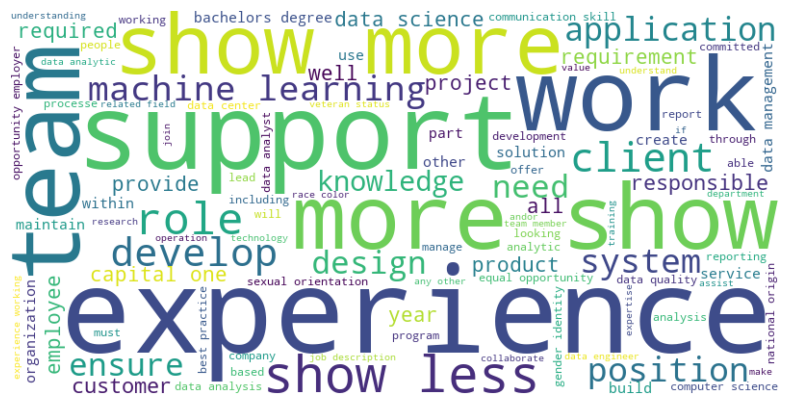

In [49]:
# generate word cloud from descriptions - 12s
eda.generate_wordcloud(merged_jobs_raw_clean_summary["job_summary"])

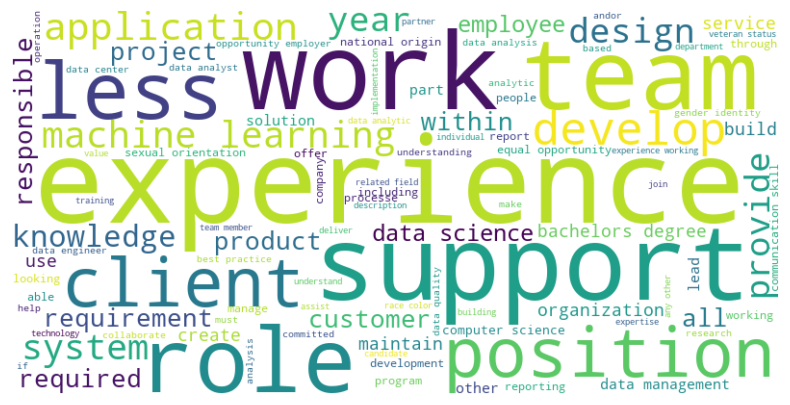

In [59]:
# generate word cloud with more stop words - 11s
more_stopwords = ["show", "more", "job", "one", "need", "ensure", "well", "will"]
eda.generate_wordcloud(merged_jobs_raw_clean_summary["job_summary"], more_stopwords)

We get a good idea here of the most used words in the dataset

In [58]:
eda.text_summary_stats(merged_jobs_raw_clean_summary, "job_summary")

{'document_stats': {'total_docs': 8861, 'empty_docs': 0, 'unique_docs': 8861},
 'length_stats': {'min_length': 20,
  'max_length': 18826,
  'total_length': 35398660,
  'char_count_mean': 3994.8831960275365,
  'char_count_median': 3757},
 'word_stats': {'avg_words_per_doc': 579.9263062859723,
  'total_words': 5138727,
  'unique_words': 64889,
  'avg_word_length': 5.89032380976845},
 'frequent_words': {'data': 97274,
  'experience': 46920,
  'work': 23941,
  'business': 21197,
  'team': 19430,
  'skills': 17056,
  'management': 15705,
  'years': 15076,
  'all': 13858,
  'other': 13719}}

Very similar to the 2020 data

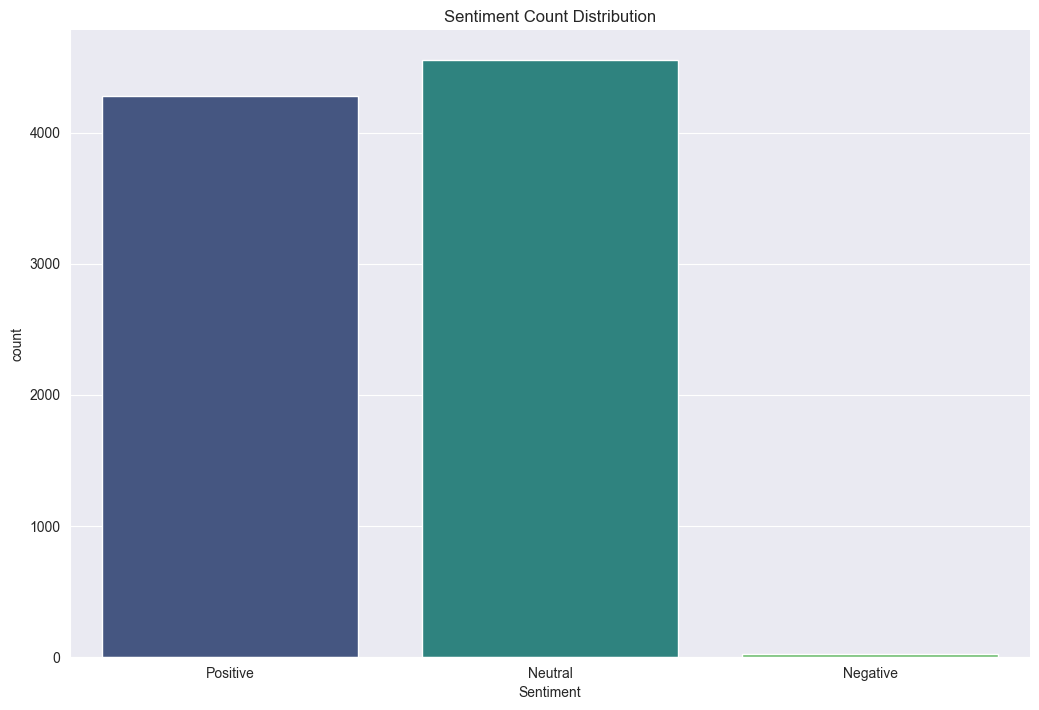

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,...,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title,Sentiment
0,https://www.linkedin.com/jobs/view/senior-mach...,company description jobs for humanity is partn...,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,...,2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ...",senior machine learning engineer,Positive
1,https://www.linkedin.com/jobs/view/principal-s...,who we are aurora nasdaq aur is delivering the...,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,...,2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",principal software engineer ml accelerators,Neutral
2,https://www.linkedin.com/jobs/view/senior-etl-...,location new york city ny position summary our...,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,...,2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da...",senior etl data warehouse specialist,Neutral
3,https://www.linkedin.com/jobs/view/senior-data...,responsibilities candidate must have significa...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,...,2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi...",senior data warehouse developer architect,Positive
4,https://www.linkedin.com/jobs/view/lead-data-e...,dice is the leading career destination for tec...,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,...,2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",lead data engineer,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,https://ca.linkedin.com/jobs/view/senior-data-...,working here at carfax canada were more than j...,https://ca.linkedin.com/jobs/view/senior-data-...,2024-01-20 05:10:03.58781+00,Finished NER,t,t,f,Senior Data Insights Analyst,CARFAX Canada,...,2024-01-14,London,Canada,Data Entry Clerk,Mid senior,Onsite,https://ca.linkedin.com/jobs/view/senior-data-...,"Data Analysis, Azure, SQL, PowerBI, Artificial...",senior data insights analyst,Positive
8857,https://uk.linkedin.com/jobs/view/data-reporti...,football association make an impact on and off...,https://uk.linkedin.com/jobs/view/data-reporti...,2024-01-21 07:11:22.099082+00,Finished NER,t,t,f,"Data Reporting Manager, FOOTBALL ASSOCIATION",Guardian Jobs,...,2024-01-16,High Wycombe,United Kingdom,Manager Forms Analysis,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/data-reporti...,"Dashboard development, Reporting, Power BI, SQ...",data reporting manager football association,Positive
8858,https://www.linkedin.com/jobs/view/corporate-a...,about the role please note review of applicant...,https://www.linkedin.com/jobs/view/corporate-a...,2024-01-19 15:10:41.177008+00,Finished NER,t,t,f,Corporate AML Alert Investigation Specialist,"Glacier Bancorp, Inc.",...,2024-01-14,Montana,United States,Teller,Mid senior,Onsite,https:

In [60]:
eda.plot_sentiment_distribution(merged_jobs_raw_clean_summary, "job_summary")

The negative plot being empty make sense as you wouldn't want to see negative descriptions where you want to attract applicants

In [53]:
# top ngrams
eda.top_ngrams(merged_jobs_raw_clean_summary["job_summary"])

[(('of', 'the'), 14809),
 (('in', 'the'), 13595),
 (('ability', 'to'), 11778),
 (('experience', 'with'), 10648),
 (('experience', 'in'), 10292),
 (('years', 'of'), 9840),
 (('more', 'show'), 8875),
 (('show', 'more'), 8850),
 (('show', 'less'), 8850),
 (('will', 'be'), 8129)]

In [54]:
# top ngrams with stopwords
stopwords = ['of', 'the', 'be', 'to', 'show', 'equal', 'as', 'this']
eda.top_ngrams(merged_jobs_raw_clean_summary["job_summary"], stopwords, n=3, top_k=15)

[(('years', 'experience', 'in'), 2944),
 (('an', 'opportunity', 'employer'), 2261),
 (('bachelors', 'degree', 'in'), 2017),
 (('sexual', 'orientation', 'gender'), 1997),
 (('or', 'any', 'other'), 1984),
 (('orientation', 'gender', 'identity'), 1826),
 (('is', 'an', 'opportunity'), 1823),
 (('in', 'computer', 'science'), 1735),
 (('years', 'experience', 'with'), 1681),
 (('race', 'color', 'religion'), 1526),
 (('experience', 'working', 'with'), 1382),
 (('without', 'regard', 'race'), 1356),
 (('experience', 'in', 'data'), 1263),
 (('are', 'looking', 'for'), 1257),
 (('degree', 'in', 'computer'), 1249)]

# Visualization

# Comparison Graphs

Compare both results